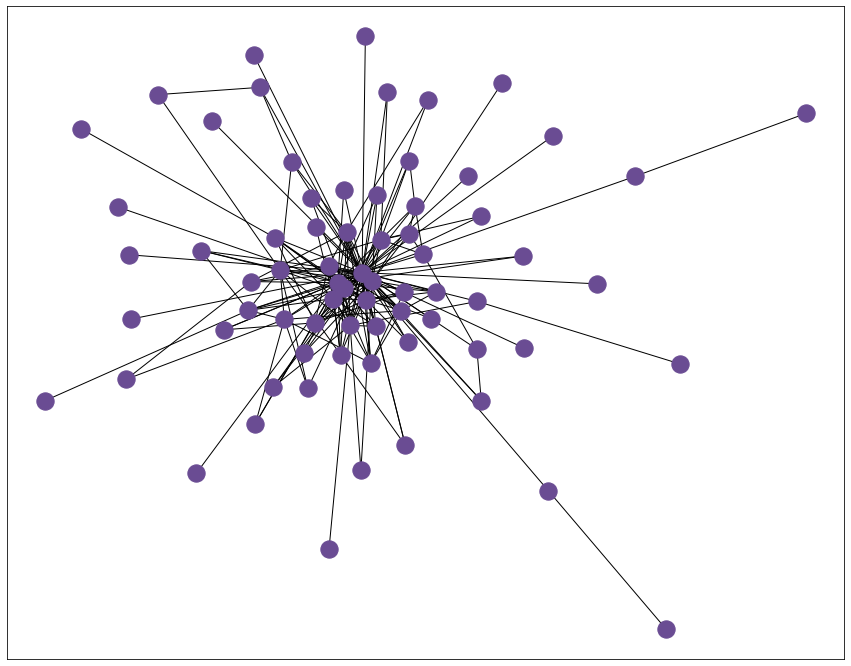

In [1]:
import json
import numpy as np

import netwulf
import networkx as nx
import matplotlib.pyplot as plt

from py_files import part2_all_code as part2

# TODO : Prendre le book officiel de Lionel
from py_files.hpbook import HPBook

class VoidBook:
    def __init__(self):
        graph = nx.karate_club_graph()

        self.graph = graph
        self.edges_weight = np.array([graph[u][v].get('weight', 1) for u, v in graph.edges])
        self.nodes_size = np.array([len(list(graph.neighbors(node))) for node in graph.nodes])

default_config = json.load(open('./netwulf_config.json', 'r'))
custom_colors = ["#FF595E", "#FFCA3A", "#8AC926", "#1982C4", "#6A4C93"]
purple = custom_colors[-1]
red = custom_colors[0]
blue = "#3333ff"
book = HPBook()

fig, ax = plt.subplots(figsize=(15,12))
nx.draw_networkx(book.graph, with_labels=False, node_color=purple, ax=ax)
plt.show()

Influence maximisation with k=5%
---

In [2]:
n = 1000
k = .05
p = .2

best_nodes = part2.greedy_influence_maximisation_problem(
    graph=book.graph,
    k=int(len(book.graph.nodes) * k),
    n=n,
    p=p
)


Plot the graph with best nodes from influence maximisation problem

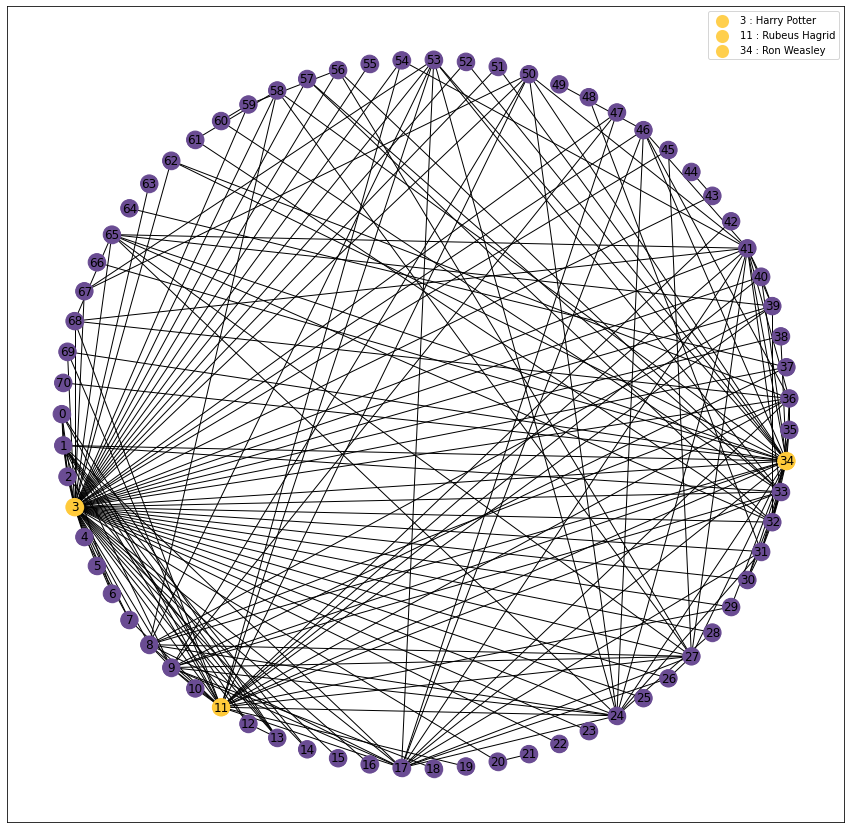

In [6]:
node_color = [custom_colors[1] if node in best_nodes else purple for node in book.graph.nodes]
node_size = [l*5 for l in list(zip(*list(book.graph.degree)))[1]]

labels = {name:idx for idx, name in enumerate(book.graph.nodes)}
best_nodes_dict = {name:idx for name,idx in labels.items() if name in best_nodes}

pos = nx.shell_layout(book.graph)
fig, ax = plt.subplots(figsize=(15,15))
#ax.set_title(f'Influence maximisation with k={k}')
lim = 1.15
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])

#s = [f"{idx:2d} : {name:s}" for name, idx in best_nodes_dict.items()]
# width = max([len(st) for st in s])
# hline = "+-"+"-"*width+"-+"
# s = hline+"\n"+"".join([f'| {l}{" "*(width-len(l))} |\n' for l in s])+hline
# ax.text(.65*lim,.75*lim,"\n".join(s), color='black', fontsize="large")

nx.draw_networkx(book.graph, pos=pos, node_color=node_color, with_labels=False, font_size=12, ax=ax, labels=labels)
handles_labels = dict()
for i,no in enumerate(book.graph.nodes()):
    lab = f"{i} : {no}"
    plot = nx.draw_networkx_nodes(book.graph, pos, nodelist=[no],node_color=node_color[i], linewidths=0.1, alpha=0.9, label=lab, ax=ax)
    if no in best_nodes:
        handles_labels[lab] = plot

plt.legend(handles_labels.values(), handles_labels.keys(), fontsize='medium', markerscale=.75)
plt.savefig("ddd", transparent=True)


Comparaison between imp and icm 
---

In [97]:
n=1000
k=.05
p=.1

k_nb = int(len(book.graph.nodes) * k)

import seaborn as sns
sns.set()

A0_greedy = part2.greedy_influence_maximisation_problem(book.graph,
                                                  k=k_nb,
                                                  n=n,
                                                  p=p
                                                 )


In [98]:
node_degree = dict(zip(*zip(*list(nx.degree(book.graph)))))
node_degree = sorted(node_degree, key=node_degree.get, reverse=True)
A0_highest_degree = node_degree[:k_nb]

In [99]:
A0_random = list(np.random.choice(node_degree, size=k_nb))

In [113]:
A0_greedy_cascade = part2.independent_cascade_model(book.graph, A0_greedy, p)
A0_highest_degree_cascade = part2.independent_cascade_model(book.graph, A0_highest_degree, p)
A0_random_cascade = part2.independent_cascade_model(book.graph, A0_random, p)
greedy_timestep = A0_greedy_cascade["spread_step"]
highest_degree_timestep = A0_highest_degree_cascade["spread_step"]
random_timestep = A0_random_cascade["spread_step"]

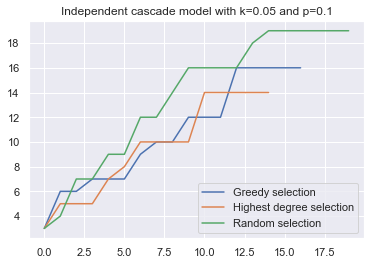

In [114]:
max_step = min(len(greedy_timestep), len(highest_degree_timestep))

plt.Figure()
plt.title(f"Independent cascade model with k={k} and p={p}")
plt.plot(greedy_timestep, label="Greedy selection")
plt.plot(highest_degree_timestep, label="Highest degree selection")
plt.plot(random_timestep, label="Random selection")
plt.legend()
plt.show()

In [106]:
plt.savefig('prout.png')


<Figure size 432x288 with 0 Axes>